In [35]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [43]:
df = pd.read_csv("/Users/saudahmad/Desktop/DM_LAB/titanic-Dataset.csv")

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
df['Pclass'].nunique()

3

In [ ]:
df['Ticket'].nunique()

In [44]:
data = df.drop(columns = ['Survived','PassengerId','Name','SibSp','Parch','Ticket', 'Fare', 'Cabin', 'Embarked'])
labels = df['Survived']
labels


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

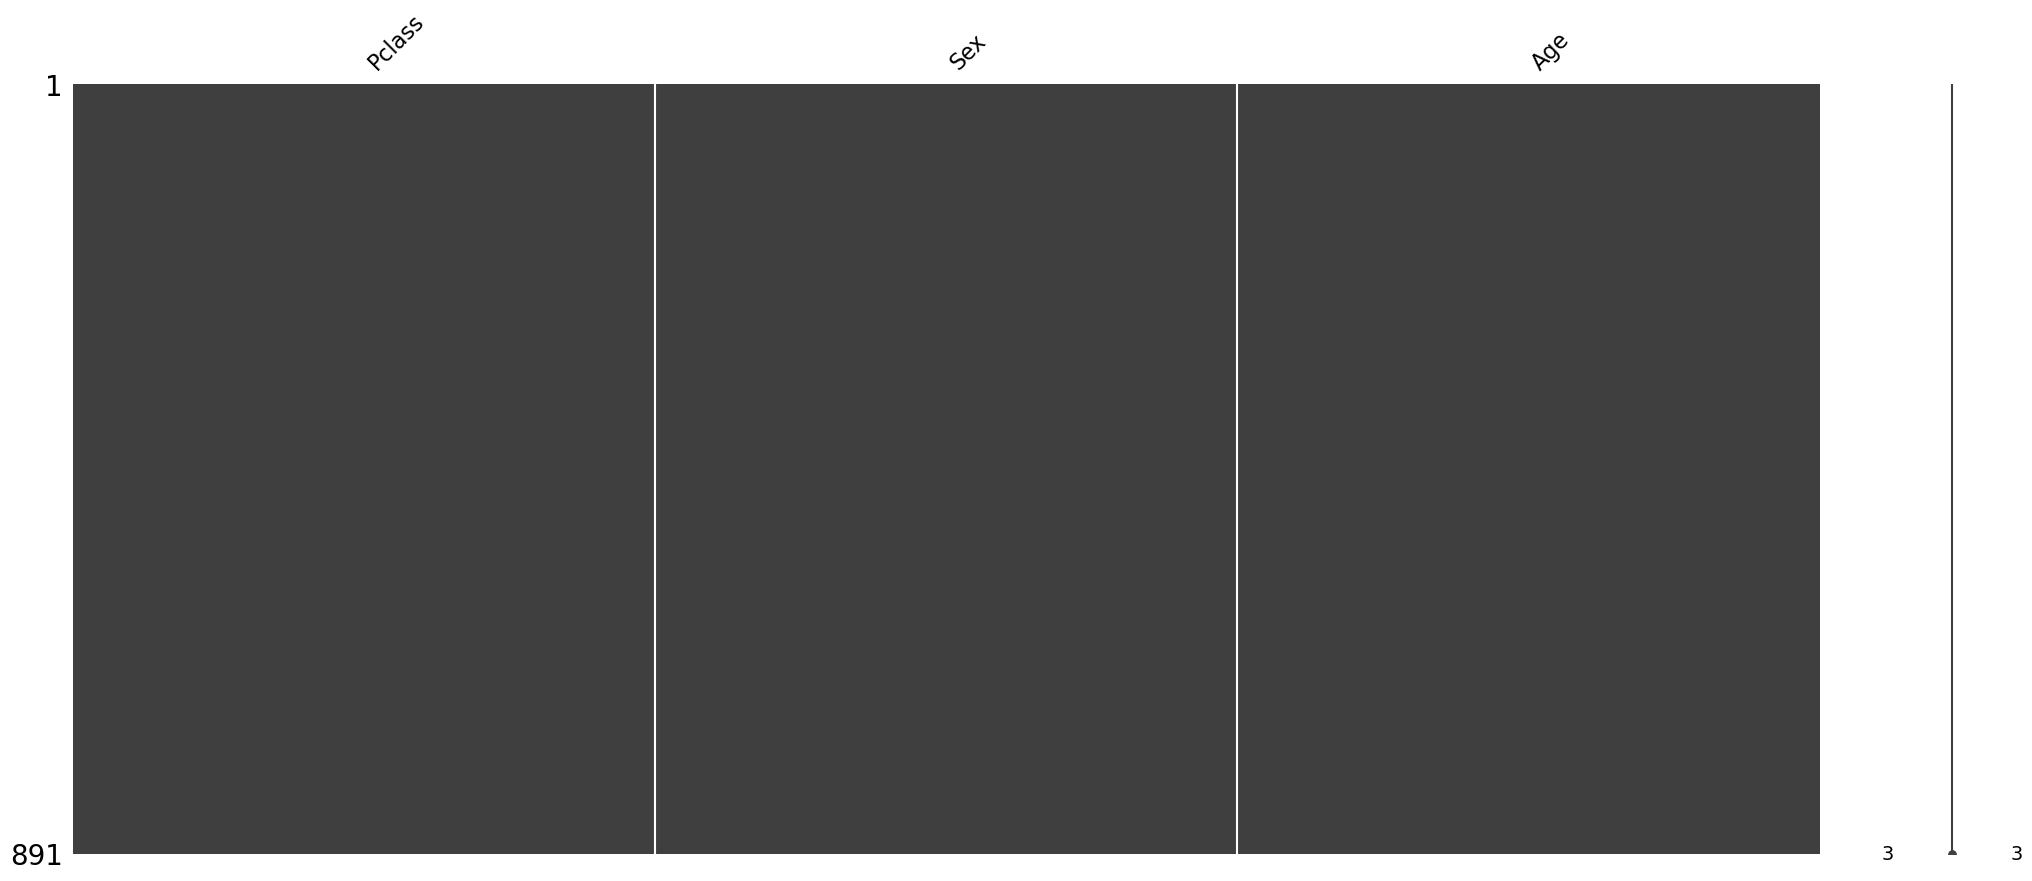

In [76]:
msno.matrix(data)
plt.show()

In [46]:
#changing the values to binary
for i in data.index:
    if data.loc[i,'Sex'] == 'male':
        data.loc[i,'Sex'] = 1
    else:
        data.loc[i,'Sex'] = 0
#Alternatively 
# df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [74]:
data['Age'] = df['Age'].fillna(df['Age'].median())

In [75]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [77]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [78]:
std_data = scaler.transform(data)
data = std_data
data

array([[ 0.82737724,  0.73769513, -0.56573646],
       [-1.56610693, -1.35557354,  0.66386103],
       [ 0.82737724, -1.35557354, -0.25833709],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 ],
       [-1.56610693,  0.73769513, -0.25833709],
       [ 0.82737724,  0.73769513,  0.20276197]])

In [79]:
X_train, X_test, Y_train, Y_test =train_test_split(data,labels, test_size=0.2, stratify=labels, random_state=2)

In [80]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(712, 3) (179, 3) (712,) (179,)


In [81]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [84]:
#Accuracy on tarining data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
training_data_accuracy

0.7893258426966292

In [86]:
#Accuracy on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
testing_data_accuracy


array([[ 0.82737724,  0.73769513, -0.56573646],
       [-1.56610693, -1.35557354,  0.66386103],
       [ 0.82737724, -1.35557354, -0.25833709],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 ],
       [-1.56610693,  0.73769513, -0.25833709],
       [ 0.82737724,  0.73769513,  0.20276197]])

In [102]:
input_data = (1,0,30)
list_items = ["""P_Class(1-3)""",'Sex','Age']

#changing the data to numpy array
input_data_np = np.asarray(input_data)
# for i in range(8):
#     print(list_items[i])
#     input(input_data_np[i])

input_data_reshaped = input_data_np.reshape(1,-1)

#Now lets transform the data, because our model is tarined on transformed data
input_data_trans = scaler.transform(input_data_reshaped)


prediction = classifier.predict(input_data_trans)


if prediction == 1:
    print("Survived")
else:
    print("Not Survived")

Survived


/Users/saudahmad/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
